# Programming Assignment 3
Author: Alec M.

Date: 04/05/2022

Class: INST 447 (SP22)

## Workspace Preparation

In [73]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [74]:
# Mount Storage (colab.research.google.com)
drive.mount('/content/drive', force_remount = False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# Import Data
dfIncome = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INST 447/WardIncome.csv")
df311 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INST 447/311requests.csv")

In [76]:
dfIncome.head()

,Ward,MedianHHincome,MeanHHincome
0,Ward 1,82159,106388
1,Ward 2,100388,140459
2,Ward 3,112873,176921
3,Ward 4,74600,111933
4,Ward 5,57554,77329


In [77]:
df311.head()

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
0,-77.025344,38.925787,1804414,S0181,Illegal Dumping,Illegal Dumping,DPW,1,2014/01/01 18:29:52+00,2014/01/03 15:32:54+00,...,397802.54,139767.31,38.925780,-77.025342,WASHINGTON,DC,20001.0,232453.0,Ward 1,"Illegal Dumping\n780 Girard St., NW, Washingto..."
1,-77.062172,38.971404,1804415,S05SL,Streetlight Repair Investigation,TOA,DDOT,1,2014/01/01 18:12:04+00,2014/01/06 04:33:16+00,...,394612.56,144832.77,38.971397,-77.062170,WASHINGTON,DC,20015.0,260266.0,Ward 4,streetlight has been out for 3 days in front o...
2,-76.942566,38.880145,1804416,S05SL,Streetlight Repair Investigation,TOA,DDOT,1,2014/01/01 18:56:57+00,2014/01/05 22:33:06+00,...,404983.65,134702.00,38.880138,-76.942564,WASHINGTON,DC,20019.0,76629.0,Ward 7,streetlight has been out for 2 days
3,-77.038403,38.928094,1804417,S0031,Bulk Collection,Bulk Collection,DPW,1,2014/01/01 21:19:18+00,2014/01/09 12:57:00+00,...,396670.30,140023.83,38.928087,-77.038401,WASHINGTON,DC,20009.0,236329.0,Ward 1,NaN
4,-76.981009,38.879628,1804418,SIGNMISS,Sign Missing Investigation,Signs,DDOT,1,2014/01/01 21:23:19+00,2014/01/08 14:05:39+00,...,401648.00,134643.15,38.879620,-76.981007,WASHINGTON,DC,20003.0,80062.0,Ward 6,"The ""Road Closed"" sign for the old entrance to..."


In [78]:
# Configure Seaborn Plot Width
sns.set(rc = {'figure.figsize':(15,6)})

In [79]:
# Subet 311 Requests to Parking Enforcement
df311_sub = df311.loc[df311["SERVICECODEDESCRIPTION"] == "Parking Enforcement"]

print(df311_sub.shape)

df311_sub[["X", "Y", "SERVICECODEDESCRIPTION", "WARD"]].head()

(26714, 30)


,X,Y,SERVICECODEDESCRIPTION,WARD
9,-77.014499,38.900429,Parking Enforcement,Ward 6
10,-77.066282,38.910015,Parking Enforcement,Ward 2
17,-77.006891,38.833219,Parking Enforcement,Ward 8
19,-77.035739,38.934271,Parking Enforcement,Ward 1
20,-76.991520,38.903684,Parking Enforcement,Ward 5


In [80]:
# Group by Ward, use SERVICECODEDESCRIPTION to count
temp = pd.DataFrame(df311_sub[['WARD', 'SERVICECODEDESCRIPTION']]).groupby(['WARD']).agg('count')
temp.reset_index(inplace = True)
temp.columns = ['Ward', 'Count']
temp

,Ward,Count
0,Ward 1,4282
1,Ward 2,5572
2,Ward 3,2139
3,Ward 4,2048
4,Ward 5,3599
5,Ward 6,6318
6,Ward 7,1405
7,Ward 8,1351


In [81]:
# Merge income data with 311 data
df = pd.merge(temp, dfIncome, how = 'inner', on = 'Ward')
df

,Ward,Count,MedianHHincome,MeanHHincome
0,Ward 1,4282,82159,106388
1,Ward 2,5572,100388,140459
2,Ward 3,2139,112873,176921
3,Ward 4,2048,74600,111933
4,Ward 5,3599,57554,77329
5,Ward 6,6318,94343,117002
6,Ward 7,1405,39165,53093
7,Ward 8,1351,30910,44245


# Data Analysis

## Visualization 1
Demonstrates the relationship between median household income (X) and the number of parking enforcement requests (Y).

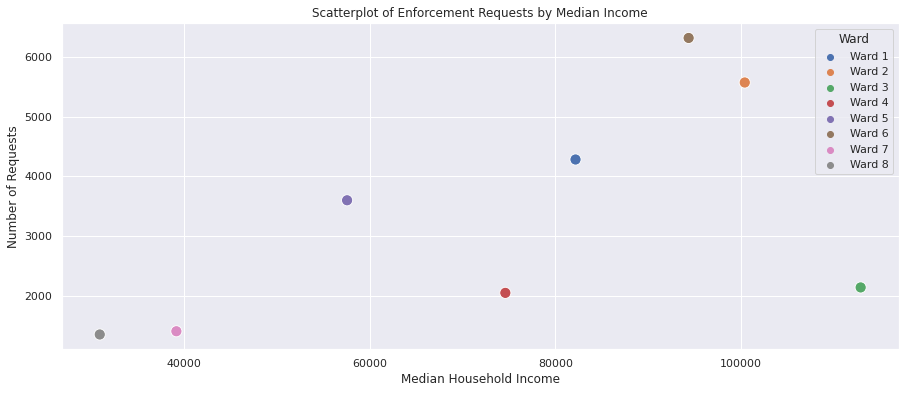

In [82]:
# Build Plot
sns.scatterplot(y = 'Count', x = 'MedianHHincome', hue = 'Ward', s = 125, data = df, legend = "auto")
plt.title("Scatterplot of Enforcement Requests by Median Income")
plt.ylabel("Number of Requests")
plt.xlabel("Median Household Income")

# Hide Output
None;

### Analysis
From the above graph, we're able to to see that there appears to be a somewhat-linear upward trend in the number of Parking Enforcement requests as the median household income increases. However, this trend drops off right beyond the \$100,000USD mark in Ward #3. The exact cause of this is unknown, but perhaps it relates to the assumed reduction in overall number of vehicles within the ward (e.g. higher income households may not drive themselves, and instead, use a service.).

## Visualization 2
Demonstrates the relationship between mean household income (X) and the number of parking enforcement requests (Y).

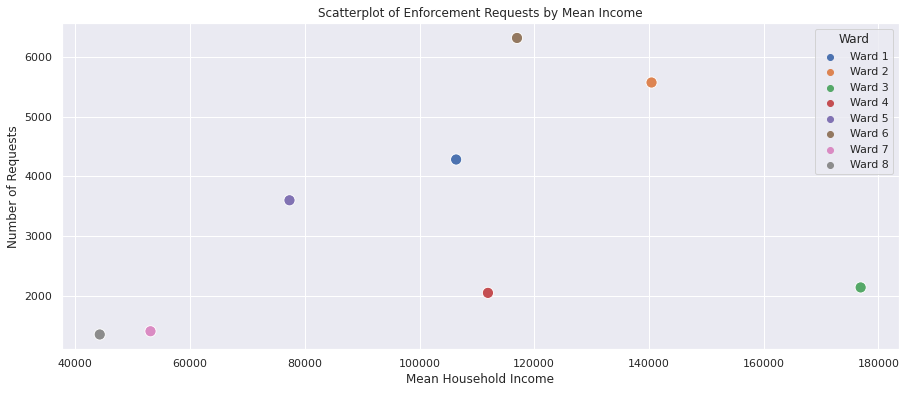

In [83]:
# Build Plot
sns.scatterplot(y = 'Count', x = 'MeanHHincome', hue = 'Ward', s = 125, data = df, legend = "auto")
plt.title("Scatterplot of Enforcement Requests by Mean Income")
plt.ylabel("Number of Requests")
plt.xlabel("Mean Household Income")

# Hide Output
None;

### Analysis
This graph, for obvious reasons, resembles the same general shape and trending of the Median Household Income graph. Key differences include that the Number of Requests variable does not begin to decrease until just beyond the \$140,000USD mark. Once again, we can truly see that the highest number of requests seems to be around the Household Income midpoint (around \$110,000USD). Many factors could contribute to this, with most of them revolving around the general geographic design of Washington, D.C.